In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class NeuralNetwork:
    def __init__(self, features, labels, hidden_node_count):
        self.input = features
        self.weights_input = np.random.rand(self.input.shape[1], hidden_node_count)
        self.hidden = None
        self.weights_hidden = np.random.rand(hidden_node_count, 1)
        self.expected_output = labels
        self.output = np.zeros(self.expected_output.shape)

    def forward_propagation(self):
        hidden_weighted_sum = np.dot(self.input, self.weights_input)
        self.hidden = sigmoid(hidden_weighted_sum)
        output_weighted_sum = np.dot(self.hidden, self.weights_hidden)
        self.output = sigmoid(output_weighted_sum)

    def back_propagation(self):
        cost = self.expected_output - self.output
        weights_hidden_update = np.dot(self.hidden.T, (2 * cost * sigmoid_derivative(self.output)))

        weights_input_update = np.dot(self.input.T, (
                    np.dot(2 * cost * sigmoid_derivative(self.output), self.weights_hidden.T) * sigmoid_derivative(
                self.hidden)))


        self.weights_hidden += weights_hidden_update
        self.weights_input += weights_input_update

def MSE(targets, predictions):
    return ((targets - predictions) ** 2).mean()

def classification_error(targets, predictions):
    y_pred = np.where(predictions > 0.5, 1, 0)
    return (targets != y_pred).mean()

def run_neural_network(feature_data, label_data, hidden_node_count, epochs):
    mse = []
    classification_error_history = []
    weights1_history = []
    weights2_history = []

    nn = NeuralNetwork(feature_data, label_data, hidden_node_count)
    for epoch in range(epochs):
        nn.forward_propagation()
        mse.append(MSE(label_data, nn.output))
        nn.back_propagation()
        classification_error_history.append(classification_error(label_data, nn.output))
        weights1_history.append(nn.weights_input.copy())
        weights2_history.append(nn.weights_hidden.copy())

    print('DANE WYJŚCIOWE: ')
    for r in nn.output:
        print(r)
    print('WAGI WARSTWY WEJŚCIOWEJ: ')
    print(nn.weights_input)
    weights1_history.append(nn.weights_input)
    print('WAGI WARSTWY UKRYTEJ: ')
    print(nn.weights_hidden)

    return mse, classification_error_history, weights1_history, weights2_history

In [7]:

HIDDEN_NODE_COUNT = 2

EPOCHS = 100

X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [0, 0],

])

Y = np.array([
        [0],
        [1],
        [1],
        [0]])

loss_history, classification_error_history, weights1_history, weights2_history = run_neural_network(X,
                                                                                                        Y,
                                                                                                        HIDDEN_NODE_COUNT,
                                                                                                        EPOCHS)

DANE WYJŚCIOWE: 
[0.10664198]
[0.91654103]
[0.91774166]
[0.10664198]
WAGI WARSTWY WEJŚCIOWEJ: 
[[-4.59582764  3.49876711]
 [-4.4488977   3.44040843]]
WAGI WARSTWY UKRYTEJ: 
[[-6.86389915]
 [ 2.57284928]]


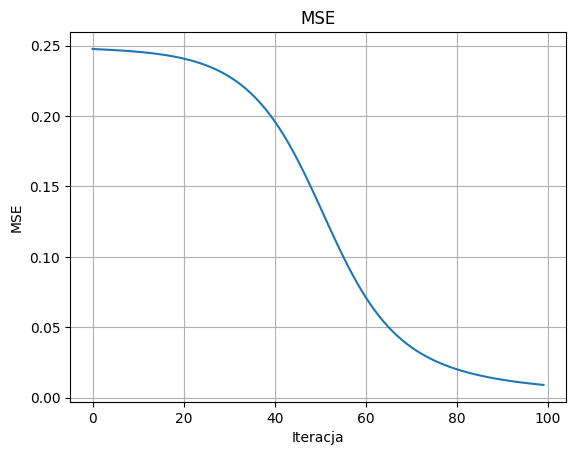

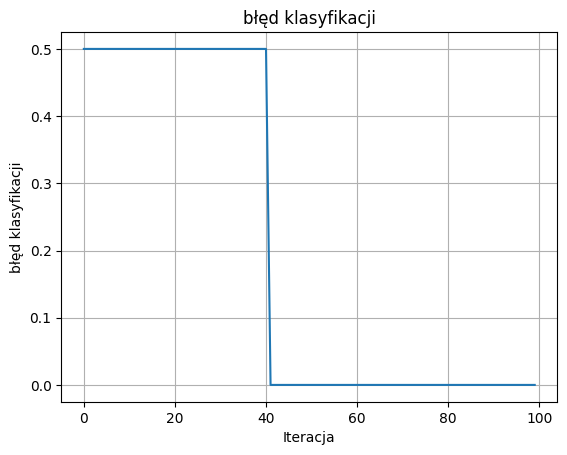

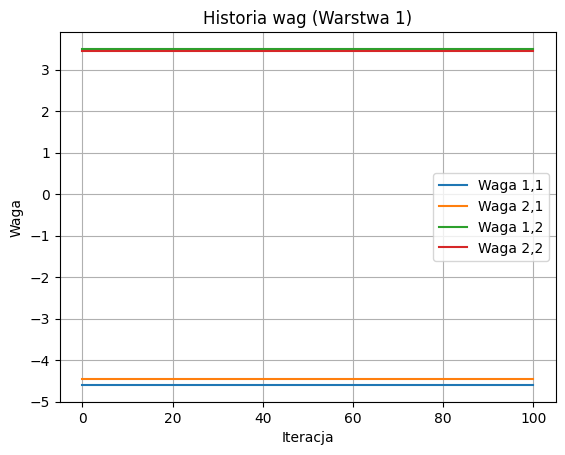

AttributeError: 'NoneType' object has no attribute 'plt'

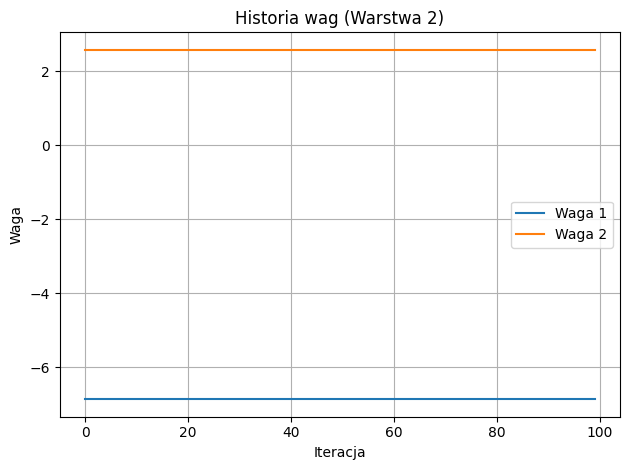

In [9]:
plt.plot(loss_history)
plt.grid()
plt.title('MSE')
plt.xlabel('Iteracja')
plt.ylabel('MSE')
plt.savefig('Images\MSE.png')
plt.show()

plt.plot(classification_error_history)
plt.grid()
plt.title('błęd klasyfikacji')
plt.xlabel('Iteracja')
plt.ylabel('błęd klasyfikacji')
plt.savefig('Images\classification_error_history.png')
plt.show()




weights1_history_np = np.array(weights1_history)  
for input_node in range(weights1_history_np.shape[2]): 
    for hidden_node in range(weights1_history_np.shape[1]): 
        plt.plot(weights1_history_np[:, hidden_node, input_node], label=f'Waga {hidden_node + 1},{input_node + 1}')
plt.title('Historia wag (Warstwa 1)')
plt.grid()
plt.xlabel('Iteracja')
plt.ylabel('Waga')
plt.legend()
plt.legend()
plt.savefig('Images\weights1.png')
plt.show()



weights2_history_np = np.array(weights2_history)  
for i in range(weights2_history_np.shape[1]): 
    plt.plot(weights2_history_np[:, i],
            label=f'Waga {i + 1}')  
plt.grid()
plt.title('Historia wag (Warstwa 2)')
plt.xlabel('Iteracja')
plt.ylabel('Waga')
plt.legend()
plt.savefig('Images\weights2.png')
plt.tight_layout().plt.show()
